In [135]:
# Celem analizy jest zweryfikowanie jak wielu klientów przybywa z roku na rok
# Zwizualizowanie danych przy pomocy wykresu słupkowego
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from datetime import datetime

In [136]:
# Wczytanie danych
customers = pd.read_csv('customers.csv', sep=";")
orders = pd.read_csv('orders.csv', sep=";", encoding="ISO-8859-1")

In [137]:
mergedOC = orders.merge(customers, on="customerid")

In [138]:
mergedOC.head(n=10)

,orderid,customerid,campaignid,orderdate,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits,householdid,gender,firstname
0,1002854,45978,2141,2009-10-13,NEWTON,MA,2459,VI,190.00,3,3,18991234,M,LOUIS
1,1002855,125381,2173,2009-10-13,NEW ROCHELLE,NY,10804,VI,10.00,1,1,36173848,M,ANTHONY
2,1002856,103122,2141,2011-06-02,MIAMI,FL,33137,AE,35.22,2,2,36204911,NaN,MERRILL
3,1002857,130980,2173,2009-10-14,E RUTHERFORD,NJ,7073,AE,10.00,1,1,36173923,F,MARIA
4,1002886,48553,2141,2010-11-19,BALTIMORE,MD,21218,VI,10.00,1,1,19227025,NaN,T.
5,1002887,106150,2173,2009-10-15,ROWAYTON,CT,6853,AE,10.00,1,1,36185316,M,CRAIG
6,1002888,27805,2173,2009-10-15,INDIANAPOLIS,IN,46240,VI,10.00,1,1,18368062,F,SUSAN
7,1002889,24546,2173,2009-10-15,PLEASANTVILLE,NY,10570,MC,10.00,1,1,19319923,M,JOE
8,1002890,43783,2173,2009-10-15,EAST STROUDSBURG,PA,18301,DB,29.68,2,2,19130968,M,ROBERT
9,1003004,15688,2173,2009-10-15,ROUND LAKE PARK,IL,60073,DB,19.68,1,1,20542726,M,BILL


In [139]:
# Ekstrakcja roku z kolumny orderDate
import datetime as dt
mergedOC['orderdate'] = pd.to_datetime(mergedOC['orderdate'])
mergedOC['year'] = mergedOC['orderdate'].dt.year

In [140]:
# Usunięcie zduplikowanych linii. Zastosowanie funkcji drop_duplicates w celu usunięcia tych linii, które reprezentują już
#istniejące householdid, które wystąpiło w danym roku.

abc = mergedOC.drop_duplicates(['year','householdid'], keep = 'first')
abc

,orderid,customerid,campaignid,orderdate,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits,householdid,gender,firstname,year
0,1002854,45978,2141,2009-10-13,NEWTON,MA,2459,VI,190.00,3,3,18991234,M,LOUIS,2009
1,1002855,125381,2173,2009-10-13,NEW ROCHELLE,NY,10804,VI,10.00,1,1,36173848,M,ANTHONY,2009
2,1002856,103122,2141,2011-06-02,MIAMI,FL,33137,AE,35.22,2,2,36204911,NaN,MERRILL,2011
3,1002857,130980,2173,2009-10-14,E RUTHERFORD,NJ,7073,AE,10.00,1,1,36173923,F,MARIA,2009
4,1002886,48553,2141,2010-11-19,BALTIMORE,MD,21218,VI,10.00,1,1,19227025,NaN,T.,2010
5,1002887,106150,2173,2009-10-15,ROWAYTON,CT,6853,AE,10.00,1,1,36185316,M,CRAIG,2009
6,1002888,27805,2173,2009-10-15,INDIANAPOLIS,IN,46240,VI,10.00,1,1,18368062,F,SUSAN,2009
7,1002889,24546,2173,2009-10-15,PLEASANTVILLE,NY,10570,MC,10.00,1,1,19319923,M,JOE,2009
8,1002890,43783,2173,2009-10-15,EAST STROUDSBURG,PA,18301,DB,29.68,2,2,19130968,M,ROBERT,2009
9,1003004,15688,2173,2009-10-15,ROUND LAKE PARK,IL,60073,DB,19.68,1,1,20542726,M,BILL,2009


In [141]:
# Pogrupowanie zamówień według roku. Wynik przedstawia jak wiele gospodarstw zamawiało produkty w każdym roku. (wartość skumulowana)
mergedOC3=abc.groupby(['year']).size().reset_index(name='TotalNumberOfCustomers')
mergedOC3

,year,TotalNumberOfCustomers
0,2009,7077
1,2010,17082
2,2011,24336
3,2012,18693
4,2013,26111
5,2014,39814
6,2015,27302
7,2016,14087


In [142]:
# Posortowanie zamówień według roku a następnie po kolumnie 'householdid'
abc3 = abc.sort_values(['year', 'householdid'], ascending=[True, False])
# Pozostawienie tylko tych linii, które jako pierwsze przedstawiają zakup przez dane 'householdid'
abc3 = abc3.drop_duplicates(['householdid'], keep = "first")
abc3

,orderid,customerid,campaignid,orderdate,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits,householdid,gender,firstname,year
32907,1022695,28254,2141,2009-11-18,DOUGLASTON,NY,11363,AE,175.00,1,1,77528715,NaN,MICHA,2009
43716,1035918,25996,2141,2009-12-14,JACKSON HEIGHTS,NY,11372,AE,19.68,1,1,76559807,M,DONALD,2009
2983,1000088,24996,2141,2009-10-04,VALLEY STREAM,NY,11580,VI,20.00,1,2,76559786,M,PHILIP,2009
33710,1033840,14661,2173,2009-12-09,NEWTOWN,CT,6470,DB,14.95,1,1,76262596,M,CARLETON,2009
33934,1029650,97633,2173,2009-12-02,MECHANICSBURGH,PA,17055,VI,24.95,2,2,76262294,M,JIM,2009
33202,1020457,98353,2173,2009-11-12,LONG BEACH,NY,11561,VI,29.90,1,2,76254275,M,ROGER,2009
34082,1035334,11544,2141,2009-12-15,NEW YORK,NY,10019,VI,59.80,1,4,75739844,M,JOHN,2009
12575,1010488,9567,2173,2009-11-04,NEW YORK,NY,10021,VI,24.95,2,2,75723851,NaN,NaN,2009
1817,1007571,37606,2173,2009-12-10,FORT LEE,NJ,7024,DB,0.00,1,1,75473729,M,MICHAEL,2009
40492,1032729,46056,2173,2009-12-09,DENVER,CO,80220,MC,19.63,1,1,74722993,M,JOHN,2009


In [143]:
# Wyświetlenie tabeli, obrazującej jak wiele unikatowych klientów dokonywało zakupu każdego roku
mergedOC4=abc3.groupby(['year']).size().reset_index(name='TotalNumberOfNewCustomers')
mergedOC4

,year,TotalNumberOfNewCustomers
0,2009,7077
1,2010,16291
2,2011,22357
3,2012,16488
4,2013,23658
5,2014,35592
6,2015,22885
7,2016,11910


Text(0.5,0,'Date time')

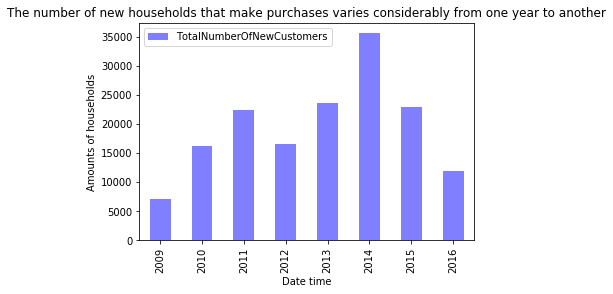

In [144]:
# Przedstawienie na wykresie zróżnicowania klientów z roku na rok
mergedOC4.plot.bar('year','TotalNumberOfNewCustomers', alpha=.5, color='blue')

# Ustawienie nazw osi oraz tytułu:
plt.title("The number of new households that make purchases varies considerably from one year to another")
plt.ylabel('Amounts of households')
plt.xlabel('Date time')

In [145]:
# Połączenie tabel przedstawiających skumulowaną oraz nową liczbę klientów w każdym roku
mergetables = mergedOC4.merge(mergedOC3, on="year")
mergetables

,year,TotalNumberOfNewCustomers,TotalNumberOfCustomers
0,2009,7077,7077
1,2010,16291,17082
2,2011,22357,24336
3,2012,16488,18693
4,2013,23658,26111
5,2014,35592,39814
6,2015,22885,27302
7,2016,11910,14087


In [146]:
# Przedstawienie procentowej proporcji nowych klientów w stosunku do totalnej liczby
mergetables['% New']=100*mergetables.TotalNumberOfNewCustomers/mergetables.TotalNumberOfCustomers
mergetables

,year,TotalNumberOfNewCustomers,TotalNumberOfCustomers,% New
0,2009,7077,7077,100.000000
1,2010,16291,17082,95.369395
2,2011,22357,24336,91.868014
3,2012,16488,18693,88.204141
4,2013,23658,26111,90.605492
5,2014,35592,39814,89.395690
6,2015,22885,27302,83.821698
7,2016,11910,14087,84.546035
